***Question 1***

My proposed method revolves around padding the hypergraph with artificial nodes.

Let $k=\text{max}\{|e| : e\in\mathcal{E}\}$, the maximum cardinality of the set of edges. Then, for every $e$ in $\mathcal{E}$ with $|e|<k$, we add artificial nodes constructed using an averaging technique on the nodes within that edge. This will create a $k$-uniform hypergraph, and we can now construct our supersymmetric adjacency tensor $\text{A} \in \mathbb{R}^{\overbrace{n \times \dots \times n}^{k}}$.

The main advantage of this method is that it is extremely simple to implement the padding of nodes. Also, each artificial node will have a low degree of connectedness so it will not have high influence in the hypergraph. This will allow us to use mathematical methods on the uniform hypergraph and possibly attribute conclusions to the true nodes of the network. Additionally, the number of new nodes added to the network will implicitly store data about the variance in edge cardinality within the hypergraph. For example, if we want to compare hypergraphs that are non-uniform, we can look at the number of artificial nodes for each hypergraph to see which one is more or less consistent with edge sizes.

There are definitely many downsides to this method. First of all, it will distort the original network structure. This may introduce bias or dilute the importance of some nodes in the hypergraph. Additionally, the addition of artificial nodes may not scale well and hit computational issues with a large $k$.

***Question 2***

In [33]:
import matplotlib.pyplot as plt
import seaborn as sns
from HAT import Hypergraph
from HAT import draw
from HAT.HAT import multicorrelations
import numpy as np
sns.set_context("paper") 



In [34]:
import pandas as pd
path = "mouse_neurons.csv"
df = pd.read_csv(path)
df.columns = [i for i in range(df.shape[1])]
df = df.drop([0], axis=1).drop([0], axis=0)
df = df.apply(pd.to_numeric, errors='coerce')

In [35]:
#(a)-(c)
edge_list = []
percentile = 99.5
for mtype in ['Drezner', 'Wang', 'Taylor']: 
    for order in range(3, 6):
        strength, group = multicorrelations(df.values, order=order, mtype=mtype)
        thresh = np.percentile(strength, percentile) #I make the threshold by percentile since some hypergraphs were empty with a fixed threshold
        idxs = np.where(strength > thresh)[0]
        edge_list.append(group[idxs])

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7)]


<Axes: >

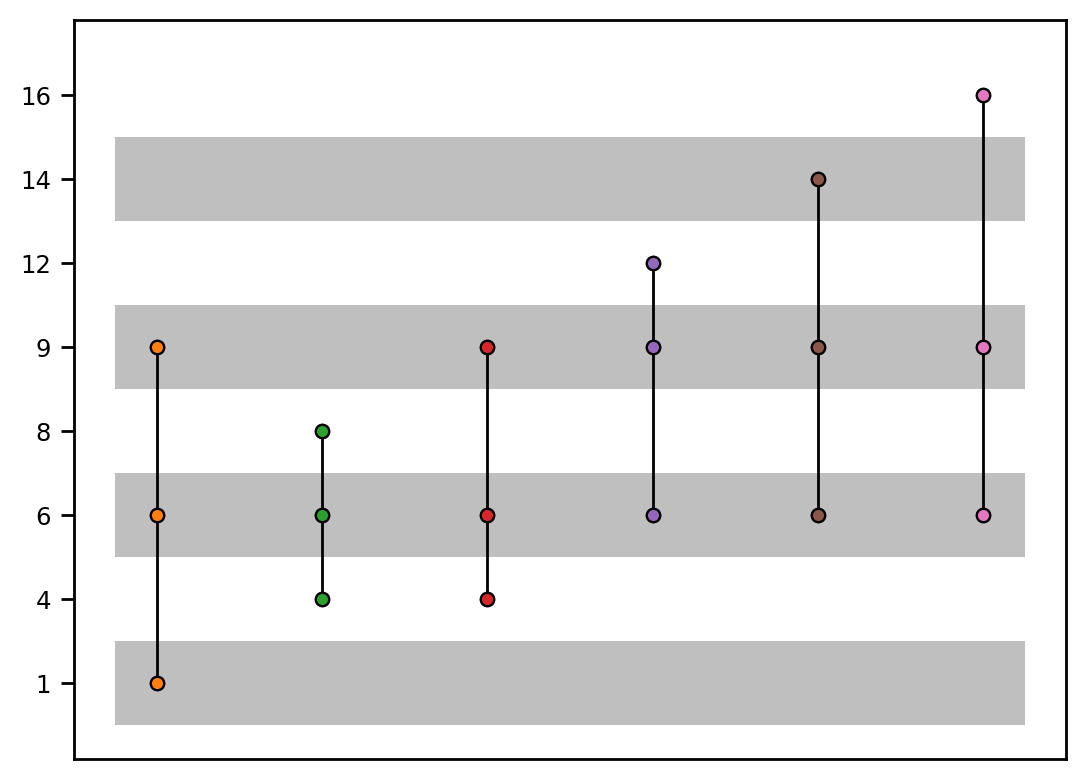

In [36]:
# 3 way
HG = Hypergraph(edge_list[0])
draw.incidence_plot(HG, node_labels = 'Names')

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16)]


<Axes: >

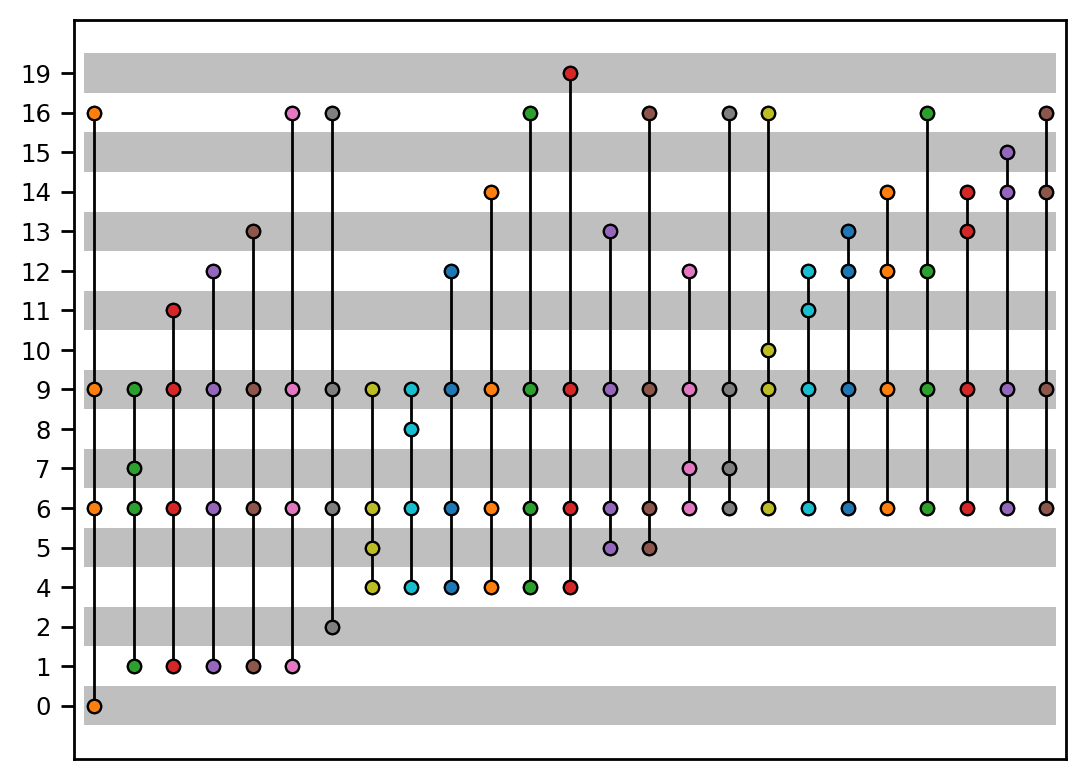

In [37]:
# 4 way
HG = Hypergraph(edge_list[1])
draw.incidence_plot(HG, node_labels = 'Names')

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19)]


<Axes: >

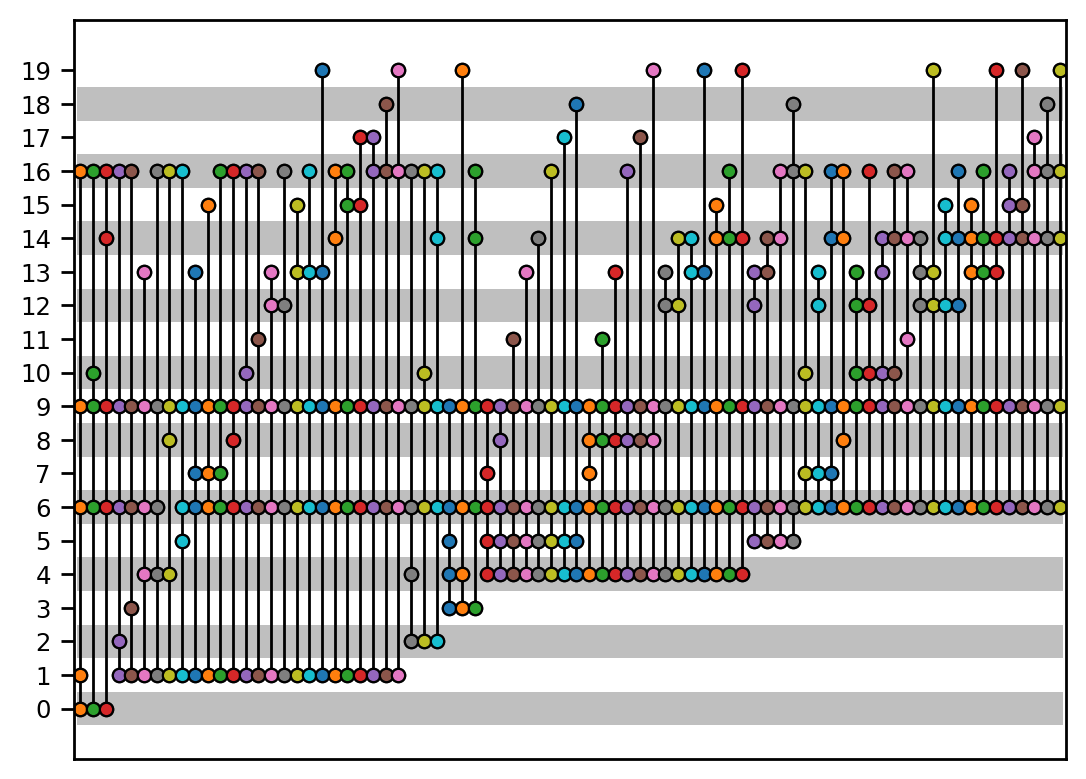

In [38]:
# 5 way
HG = Hypergraph(edge_list[2])
draw.incidence_plot(HG, node_labels = 'Names')

y_positions=[np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9), np.int64(10), np.int64(11), np.int64(12), np.int64(13), np.int64(14), np.int64(15), np.int64(16), np.int64(17), np.int64(18), np.int64(19), np.int64(20), np.int64(21), np.int64(22), np.int64(23), np.int64(24), np.int64(25), np.int64(26), np.int64(27), np.int64(28), np.int64(29), np.int64(30), np.int64(31), np.int64(32), np.int64(33), np.int64(34), np.int64(35), np.int64(36), np.int64(37), np.int64(38), np.int64(39), np.int64(40), np.int64(41), np.int64(42), np.int64(43), np.int64(44), np.int64(45), np.int64(46), np.int64(47), np.int64(48), np.int64(49), np.int64(50), np.int64(51), np.int64(52), np.int64(53), np.int64(54), np.int64(55), np.int64(56), np.int64(57), np.int64(58), np.int64(59), np.int64(60), np.int64(61), np.int64(62), np.int64(63), np.int64(64), np.int64(65), np.int64(66), np.int64(67), np.int64(68), np.int64(69), np.int64(70), np.

<Axes: >

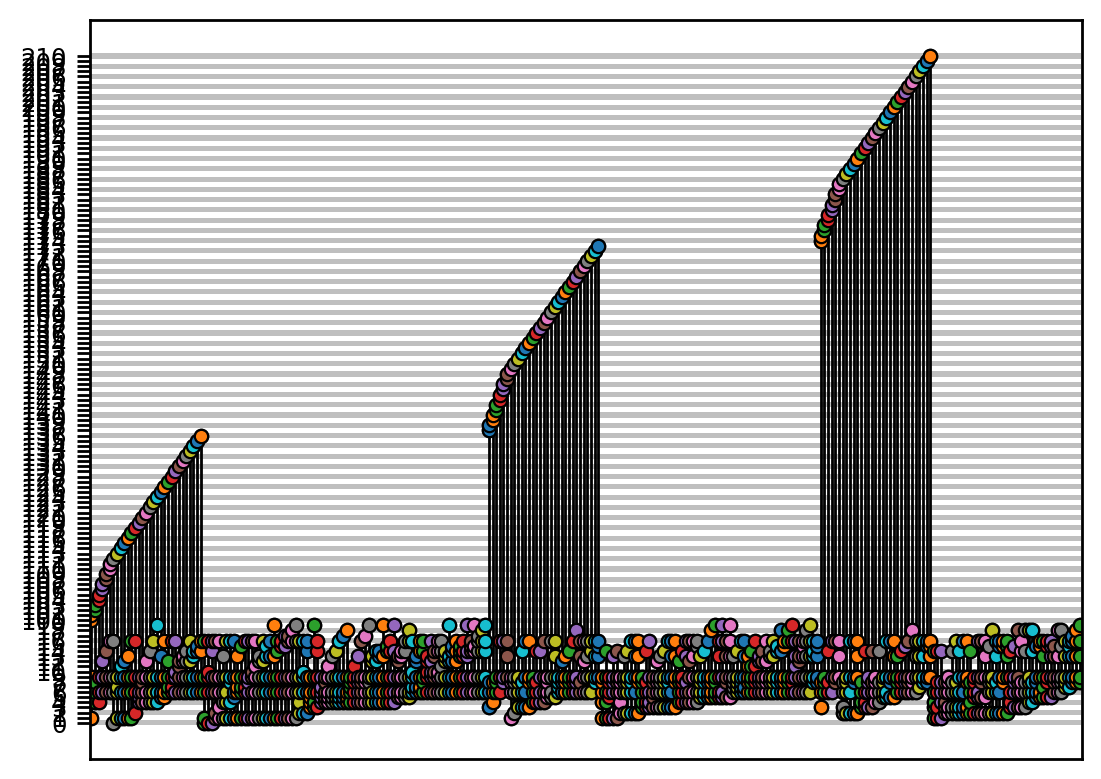

In [39]:
#Create non-uniform hypergraph by combining everything above.
all_edges = [edge for sublist in edge_list for edge in sublist] 

# My method to make uniform hypergraph
max_k = 5
newnodeinit = 100
for i in range(len(all_edges)):
    while len(all_edges[i]) < max_k:
        all_edges[i] = np.append(all_edges[i], newnodeinit)
        newnodeinit +=1

HG = Hypergraph(all_edges)
draw.incidence_plot(HG, node_labels = 'Names')

In [40]:
pd.DataFrame(all_edges)

,0,1,2,3,4
0,1,6,9,100,101
1,4,6,8,102,103
2,4,6,9,104,105
3,6,9,12,106,107
4,6,9,14,108,109
...,...,...,...,...,...
322,8,9,13,14,16
323,8,9,13,15,16
324,8,9,13,16,17
325,8,9,13,16,18


You can see above that although my algorithm can create a $k$-uniform hypergraph adjacency tensor, the resulting network has a lot of "useless" nodes. This problem scales by a large margin when we set the threshold for multicorrelations lower, as you get increasingly lower proportion of true nodes / artifical nodes in the network.